In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
data = pd.read_excel(r"C:\Users\joao\Desktop\imoveis\sala-comercial-a-venda_0_99.xlsx")

## Sobre

Nessa parte irei mudar e transformar os dados retirados anteriormente através de Web Scraping

Os dados foram retirados do site chavesnamao e são referentes as salas comerciais a venda em florianópolis

## Valores retirados:

Para cada instancia do Dataframe:
    
   **Azul**: Refere-se as caracteristicas
    
   **Verde**: Refere-se a descrição 
    
   **Roxo**: Refere-se ao bairro
    
   **Amarelo**: Refere-se ao preço
    
   **Marrom**: Refere-se ao preço condominio
    
   **Vermelho**: Refere-s ao endereço

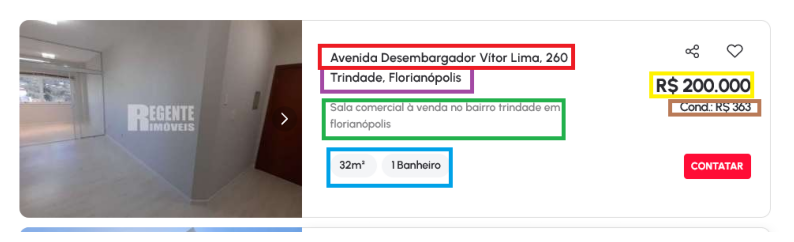

In [366]:

# Caminho para a imagem
caminho_imagem = r'C:\Users\joao\Desktop\imoveis\oquefoiretirado.png'

# Carregar a imagem
imagem = mpimg.imread(caminho_imagem)

plt.figure(figsize=(10, 8))

# Exibir a imagem
plt.imshow(imagem)
plt.axis('off')  # Desativa os eixos
plt.show()

In [71]:
data

,caracteristicas,descrição,bairro,preço,condominio,endereço
0,38m² 1 Banheiro1 Garagem,Venda | sala comercial,"Centro, Florianópolis",R$ 650.000,R$ 992,"Rua Dom Jaime Câmara, 170"
1,5.776m² 2 Salas 4 Banheiros,Sala empresarial comercial no centro de floria...,"Centro, Florianópolis",R$ 375.000,R$ 637,Endereço não disponível
2,30m² 1 Banheiro,"Sala comercia no itacorubi com 42,86m2","Itacorubi, Florianópolis",R$ 244.800,R$ 107,"Rua Pastor William Richard Schisler Filho, --"
3,29m² 1 Sala 1 Banheiro1 Garagem,Sala comercial - estreito,"Estreito, Florianópolis",R$ 160.000,R$ 500,"Rua Almirante Lucas Boiteux, 40"
4,745m² 5 Banheiros3 Garagens,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2...","Trindade, Florianópolis",R$ 2.100.000,R$ 0,Servid&#xe3;o Jos&#xe9; Ventura
...,...,...,...,...,...,...
1480,59m² 1 Banheiro,"Centro comercial ars - salas de 92,10 m² no ce...","Centro, Florianópolis",R$ 645.657,R$ 709,"Rua Emílio Blum, 131"
1481,33m²,"Sala comercial à venda, saco grande, florianóp...","Centro, Florianópolis",R$ 250.000,R$ 350,"Avenida Rio Branco, 817"
1482,295m² 4 Banheiros,Salas comerciais à venda nos bairros de Floria...,"Centro, Florianópolis",R$ 1.600.000,R$ 3.229,Praça Xv De Novembro
1483,41m² 1 Banheiro,Sala à venda em estreito florianópolis,"Centro, Florianópolis",R$ 488.246,R$ 536,Endereço não disponível


## O que foi feito por coluna:
    
   **caracteristicas**: Retirada dos valores de m² , número de banheiros, garagem e salas
    
   **bairro**: Retirada do nome de cada bairro e geolocalização referente a esse bairro
    
   **preço e condominio**: transformação em variaveis númericas
    
   **endereço**: retirada da geolocalização de cada endereço
   
   Os resultados podem ser visto no final

In [13]:
#número de instancias nulas
data.isnull().sum()

caracteristicas    0
descrição          0
bairro             0
preço              0
condominio         0
endereço           0
dtype: int64

# Transformando as colunas "preço" e "condominio" em númericas

In [40]:
#conferindo quantos preços estão disponiveis, separando o valor do preço do "R$, vamos também retirar os pontos de separação de milhar"
data['preço'].str.split(' ').str[-1].str.replace('.' , '')

0        650000
1        375000
2        244800
3        160000
4       2100000
         ...   
1480     645657
1481     250000
1482    1600000
1483     488246
1484     244800
Name: preço, Length: 1485, dtype: object

In [49]:
#dois valores da coluna estão como "confira"
data['preço'].str.split(' ').str[-1].str.replace('.' , '')[~(data['preço'].str.split(' ').str[-1].str.replace('.' , '')).apply(lambda x: x.isnumeric())]

74     Confira
145    Confira
Name: preço, dtype: object

In [60]:
#podemos substutir esses valores por np.nan e guarda essa coluna
def preco_to_float(x):
    if x.isnumeric():
        return float(x)
    else:
        return np.nan



coluna_preco_arrumada = data['preço'].str.split(' ').str[-1].str.replace('.' , '').apply(preco_to_float)

In [62]:
coluna_preco_arrumada

0        650000.0
1        375000.0
2        244800.0
3        160000.0
4       2100000.0
          ...    
1480     645657.0
1481     250000.0
1482    1600000.0
1483     488246.0
1484     244800.0
Name: preço, Length: 1485, dtype: float64

In [63]:
#vamos fazer a mesma coisa pro condominio

In [64]:
data['condominio'].str.split(' ').str[-1].str.replace('.' , '')[~(data['condominio'].str.split(' ').str[-1].str.replace('.' , '')).apply(lambda x: x.isnumeric())]

Series([], Name: condominio, dtype: object)

In [66]:
#vamos a aplicar a mesma função, só que agora agora nos preços do condominio

In [67]:
coluna_condominio_arrumada = data['condominio'].str.split(' ').str[-1].str.replace('.' , '').apply(preco_to_float)

In [68]:
coluna_condominio_arrumada

0        992.0
1        637.0
2        107.0
3        500.0
4          0.0
         ...  
1480     709.0
1481     350.0
1482    3229.0
1483     536.0
1484     238.0
Name: condominio, Length: 1485, dtype: float64

# Retirando o valor do bairro na coluna "bairro"

In [73]:
#vamos retirar o bairro agora, vamos primeiro conferir se todas instancias acabam com "Florianópolis" e podemos splitar e pegar a primeira informação a partir disso
data['bairro']

0          Centro, Florianópolis
1          Centro, Florianópolis
2       Itacorubi, Florianópolis
3        Estreito, Florianópolis
4        Trindade, Florianópolis
                  ...           
1480       Centro, Florianópolis
1481       Centro, Florianópolis
1482       Centro, Florianópolis
1483       Centro, Florianópolis
1484    Itacorubi, Florianópolis
Name: bairro, Length: 1485, dtype: object

In [79]:
#todas instancias são divididas entre o bairro e acabam com "Florianópolis", vamos pegar só o bairro
data['bairro'].str.split(',').str[1].value_counts()

bairro
Florianópolis    1485
Name: count, dtype: int64

In [85]:
data['bairro'].str.split(',').str[0]

0          Centro
1          Centro
2       Itacorubi
3        Estreito
4        Trindade
          ...    
1480       Centro
1481       Centro
1482       Centro
1483       Centro
1484    Itacorubi
Name: bairro, Length: 1485, dtype: object

In [87]:
bairros = data['bairro'].str.split(',').str[0].values

In [88]:
bairros

array(['Centro', 'Centro', 'Itacorubi', ..., 'Centro', 'Centro',
       'Itacorubi'], dtype=object)

# Retirando m²,banheiro,garagem,salas na coluna caracteristicas

In [89]:
#agora vamos retirar as caracteristicas m2, quantidade de banhairo, garagem e etc

In [91]:
data['caracteristicas']

0               38m² 1  Banheiro1  Garagem
1            5.776m² 2  Salas 4  Banheiros
2                         30m² 1  Banheiro
3       29m² 1  Sala 1  Banheiro1  Garagem
4            745m² 5  Banheiros3  Garagens
                       ...                
1480                      59m² 1  Banheiro
1481                                 33m² 
1482                    295m² 4  Banheiros
1483                      41m² 1  Banheiro
1484                                 26m² 
Name: caracteristicas, Length: 1485, dtype: object

In [217]:
caracteristicas = data['caracteristicas'].str.replace('  ', ' ')
caracteristicas = caracteristicas.str.replace('.' , '')
def extrair_caracteristicas(texto):
    m2 = []
    salas = []
    banheiros = []
    garagens = []

    # Encontrando padrões usando expressões regulares
    padroes = {
        'm²': r'(\d+\.?\d*)m²?',
        'Salas': r'(\d+) Sala',
        'Banheiros': r'(\d+) Banheiro',
        'Garagens': r'(\d+) Garage'
    }

    for _, padrao in padroes.items():
        resultado = re.findall(padrao, texto)
        if resultado:
            if padrao == r'(\d+\.?\d*)m²?':
                m2.append(float(resultado[0]))
            elif padrao == r'(\d+) Sala':
                salas.append(float(resultado[0]))
            elif padrao == r'(\d+) Banheiro':
                banheiros.append(float(resultado[0]))
            elif padrao == r'(\d+) Garage':
                garagens.append(float(resultado[0]))
        else:
            if padrao == r'(\d+\.?\d*)m²?':
                m2.append(np.nan)
            elif padrao == r'(\d+) Sala':
                salas.append(np.nan)
            elif padrao == r'(\d+) Banheiro':
                banheiros.append(np.nan)
            elif padrao == r'(\d+) Garage':
                garagens.append(np.nan)

    return pd.Series({'m²': m2, 'Salas': salas, 'Banheiros': banheiros, 'Garagens': garagens})

# Aplicando a função para extrair características na coluna 'caracteristicas' do DataFrame
caract_extraidas = caracteristicas.apply(extrair_caracteristicas)

# Concatenando as séries resultantes em um único DataFrame
caract_extraidas = pd.concat([caract_extraidas[col] for col in caract_extraidas.columns], axis=1)

caract_extraidas = caract_extraidas.astype(str).applymap(lambda x: x.replace('[' , '')).applymap(lambda x: x.replace(']' , ''))
def replacezero(x):
    return x.replace('.0' , '')
caract_extraidas = caract_extraidas.applymap(replacezero)

        m² Salas Banheiros Garagens
0       38   nan         1        1
1     5776     2         4      nan
2       30   nan         1      nan
3       29     1         1        1
4      745   nan         5        3
...    ...   ...       ...      ...
1480    59   nan         1      nan
1481    33   nan       nan      nan
1482   295   nan         4      nan
1483    41   nan         1      nan
1484    26   nan       nan      nan

[1485 rows x 4 columns]


In [218]:
caract_extraidas

,m²,Salas,Banheiros,Garagens
0,38,nan,1,1
1,5776,2,4,nan
2,30,nan,1,nan
3,29,1,1,1
4,745,nan,5,3
...,...,...,...,...
1480,59,nan,1,nan
1481,33,nan,nan,nan
1482,295,nan,4,nan
1483,41,nan,1,nan


In [248]:
#juntando as informações extraidas do dataframe
novo_frame = pd.concat([caract_extraidas , pd.DataFrame([ coluna_preco_arrumada.values , coluna_condominio_arrumada.values , bairros , data['endereço'] , data['descrição']]).T] , axis=1)
novo_frame.columns = ['m2' , 'salas' , 'banheiros' , 'garagens' , 'preço' , 'condominio' , 'bairro' , 'endereço' , 'descrição']

In [249]:
novo_frame

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição
0,38,nan,1,1,650000.0,992.0,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial
1,5776,2,4,nan,375000.0,637.0,Centro,Endereço não disponível,Sala empresarial comercial no centro de floria...
2,30,nan,1,nan,244800.0,107.0,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2"
3,29,1,1,1,160000.0,500.0,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito
4,745,nan,5,3,2100000.0,0.0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2..."
...,...,...,...,...,...,...,...,...,...
1480,59,nan,1,nan,645657.0,709.0,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce..."
1481,33,nan,nan,nan,250000.0,350.0,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp..."
1482,295,nan,4,nan,1600000.0,3229.0,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...
1483,41,nan,1,nan,488246.0,536.0,Centro,Endereço não disponível,Sala à venda em estreito florianópolis


In [308]:
# eu descobri que algumas instancias, possuem o m² separado por ., como na imagem, irei remover qualquer instancia que tiver esse problema

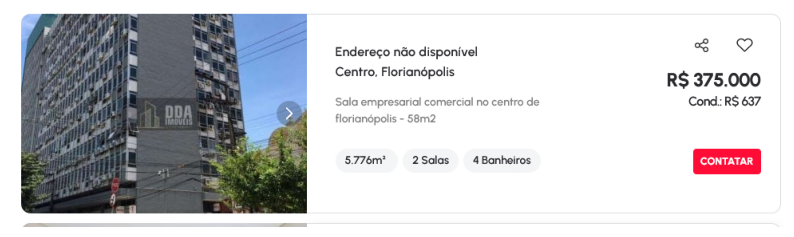

In [251]:

# Caminho para a imagem
caminho_imagem = r'C:\Users\joao\Desktop\imoveis\Screenshot 2024-03-01 at 17-29-31 Imóveis comerciais em Florianópolis - SC.png'

# Carregar a imagem
imagem = mpimg.imread(caminho_imagem)

plt.figure(figsize=(10, 8))

# Exibir a imagem
plt.imshow(imagem)
plt.axis('off')  # Desativa os eixos
plt.show()

In [307]:
data['caracteristicas'].str.split(' ').str[0][(data['caracteristicas'].str.split(' ').str[0]).apply(lambda x: '.' in x)]

1        5.776m²
322      2.000m²
502      3.000m²
594      2.000m²
600      2.406m²
904      7.193m²
968     28.000m²
1026     1.200m²
1122     1.200m²
1415     1.620m²
1426     1.130m²
Name: caracteristicas, dtype: object

In [313]:
novo_frame = novo_frame[~(data['caracteristicas'].str.split(' ').str[0]).apply(lambda x: '.' in x)]

In [314]:
novo_frame['bairro']

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição
0,38,nan,1,1,650000.0,992.0,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial
2,30,nan,1,nan,244800.0,107.0,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2"
3,29,1,1,1,160000.0,500.0,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito
4,745,nan,5,3,2100000.0,0.0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2..."
5,27,nan,1,nan,186000.0,370.0,Trindade,"Rua Cônego Bernardo, 101",Sala à venda no bairro trindade - florianópoli...
...,...,...,...,...,...,...,...,...,...
1480,59,nan,1,nan,645657.0,709.0,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce..."
1481,33,nan,nan,nan,250000.0,350.0,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp..."
1482,295,nan,4,nan,1600000.0,3229.0,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...
1483,41,nan,1,nan,488246.0,536.0,Centro,Endereço não disponível,Sala à venda em estreito florianópolis


In [326]:
novo_frame_back = novo_frame.copy()

In [338]:
#obtendo a geolocalização a partir dos endereços

# obtendo a geolocalização a partir dos endereços

In [334]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Criar um objeto geolocalizador Nominatim
geolocalizador = Nominatim(user_agent="geo_locator")

# Função para obter a geolocalização (latitude e longitude) com base no endereço e bairro
def obter_geolocalizacao(endereco, bairro, cidade):
    endereco_completo = f"{endereco}, {bairro}, {cidade}"
    location = geolocalizador.geocode(endereco_completo)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Crie uma linha de latitude e longitude com todos os valores "Ainda não obtido"
novo_frame['latitude'] = 'Ainda não obtido'
novo_frame['longitude'] = 'Ainda não obtido'

# Iterar sobre as linhas do DataFrame e atualizar a geolocalização linha por linha
for index, row in novo_frame.iterrows():
    if row['latitude'] == 'Ainda não obtido' and row['longitude'] == 'Ainda não obtido':
        latitude, longitude = obter_geolocalizacao(row['endereço'], row['bairro'], 'Florianópolis')
        novo_frame.at[index, 'latitude'] = latitude
        novo_frame.at[index, 'longitude'] = longitude
    
    # Adicione um atraso de 5 segundos a cada 30 instâncias processadas
    if index % 30 == 0 and index != 0:
        time.sleep(5)

# Exibir o DataFrame com as coordenadas geográficas
print(novo_frame[['endereço', 'bairro', 'latitude', 'longitude']])

C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2534175471.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_frame['latitude'] = 'Ainda não obtido'
C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2534175471.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_frame['longitude'] = 'Ainda não obtido'


                                            endereço     bairro   latitude  \
0                         Rua Dom Jaime Câmara, 170      Centro -27.592568   
2     Rua Pastor William Richard Schisler Filho, --   Itacorubi -27.576512   
3                   Rua Almirante Lucas Boiteux, 40    Estreito       None   
4                   Servid&#xe3;o Jos&#xe9; Ventura    Trindade       None   
5                          Rua Cônego Bernardo, 101    Trindade -27.594962   
...                                              ...        ...        ...   
1480                           Rua Emílio Blum, 131      Centro -27.592949   
1481                        Avenida Rio Branco, 817      Centro -27.591467   
1482                           Praça Xv De Novembro      Centro -27.597639   
1483                        Endereço não disponível      Centro       None   
1484                       Rua Patrício Farias, 103   Itacorubi -27.574736   

      longitude  
0    -48.551297  
2    -48.506754  
3        

In [337]:
novo_frame

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude
0,38,nan,1,1,650000.0,992.0,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial,-27.592568,-48.551297
2,30,nan,1,nan,244800.0,107.0,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2",-27.576512,-48.506754
3,29,1,1,1,160000.0,500.0,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito,None,None
4,745,nan,5,3,2100000.0,0.0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2...",None,None
5,27,nan,1,nan,186000.0,370.0,Trindade,"Rua Cônego Bernardo, 101",Sala à venda no bairro trindade - florianópoli...,-27.594962,-48.519999
...,...,...,...,...,...,...,...,...,...,...,...
1480,59,nan,1,nan,645657.0,709.0,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce...",-27.592949,-48.545257
1481,33,nan,nan,nan,250000.0,350.0,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp...",-27.591467,-48.55013
1482,295,nan,4,nan,1600000.0,3229.0,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...,-27.597639,-48.549858
1483,41,nan,1,nan,488246.0,536.0,Centro,Endereço não disponível,Sala à venda em estreito florianópolis,None,None


In [349]:
novo_frame_back = novo_frame.copy()

In [344]:
#Como a principal análise vai ser do preço a partir do m², irei remover as instancias que não apresentam o m²

In [342]:
len(novo_frame['m2'][~(novo_frame['m2'].str.isnumeric())])

60

In [350]:
novo_frame = novo_frame[(novo_frame['m2'].str.isnumeric())]

In [354]:
#também irei substituir os 'nan' em salas banheiros e garagens por zero

In [355]:
novo_frame

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude
0,38,nan,1,1,650000.0,992.0,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial,-27.592568,-48.551297
2,30,nan,1,nan,244800.0,107.0,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2",-27.576512,-48.506754
3,29,1,1,1,160000.0,500.0,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito,None,None
4,745,nan,5,3,2100000.0,0.0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2...",None,None
5,27,nan,1,nan,186000.0,370.0,Trindade,"Rua Cônego Bernardo, 101",Sala à venda no bairro trindade - florianópoli...,-27.594962,-48.519999
...,...,...,...,...,...,...,...,...,...,...,...
1480,59,nan,1,nan,645657.0,709.0,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce...",-27.592949,-48.545257
1481,33,nan,nan,nan,250000.0,350.0,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp...",-27.591467,-48.55013
1482,295,nan,4,nan,1600000.0,3229.0,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...,-27.597639,-48.549858
1483,41,nan,1,nan,488246.0,536.0,Centro,Endereço não disponível,Sala à venda em estreito florianópolis,None,None


In [357]:
novo_frame['salas'] = novo_frame['salas'].replace('nan' , 0)
novo_frame['banheiros'] = novo_frame['banheiros'].replace('nan' , 0)
novo_frame['garagens'] = novo_frame['garagens'].replace('nan' , 0)

C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2493278611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_frame['salas'] = novo_frame['salas'].replace('nan' , 0)
C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2493278611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_frame['banheiros'] = novo_frame['banheiros'].replace('nan' , 0)
C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2493278611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [358]:
novo_frame

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude
0,38,0,1,1,650000.0,992.0,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial,-27.592568,-48.551297
2,30,0,1,0,244800.0,107.0,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2",-27.576512,-48.506754
3,29,1,1,1,160000.0,500.0,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito,None,None
4,745,0,5,3,2100000.0,0.0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2...",None,None
5,27,0,1,0,186000.0,370.0,Trindade,"Rua Cônego Bernardo, 101",Sala à venda no bairro trindade - florianópoli...,-27.594962,-48.519999
...,...,...,...,...,...,...,...,...,...,...,...
1480,59,0,1,0,645657.0,709.0,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce...",-27.592949,-48.545257
1481,33,0,0,0,250000.0,350.0,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp...",-27.591467,-48.55013
1482,295,0,4,0,1600000.0,3229.0,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...,-27.597639,-48.549858
1483,41,0,1,0,488246.0,536.0,Centro,Endereço não disponível,Sala à venda em estreito florianópolis,None,None


# retirando a latitude e longitude de cada bairro

In [364]:
#retirando a latitude e longitude de cada bairro

In [362]:
from geopy.geocoders import Nominatim

# Criar um objeto geolocalizador Nominatim
geolocalizador = Nominatim(user_agent="geo_locator")

# Função para obter a geolocalização (latitude e longitude) de um endereço
def obter_geolocalizacao(endereco):
    location = geolocalizador.geocode(endereco)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Pegar os bairros únicos
bairros_unicos = novo_frame['bairro'].unique()

# Mapear as coordenadas de cada bairro
coordenadas_bairros = {}
for bairro in bairros_unicos:
    endereco = f"{bairro}, Florianópolis"
    latitude, longitude = obter_geolocalizacao(endereco)
    coordenadas_bairros[bairro] = {'latitude': latitude, 'longitude': longitude}

# Adicionar as coordenadas dos bairros ao DataFrame
novo_frame['bairro_latitude'] = novo_frame['bairro'].map(lambda x: coordenadas_bairros[x]['latitude'])
novo_frame['bairro_longitude'] = novo_frame['bairro'].map(lambda x: coordenadas_bairros[x]['longitude'])

# Exibir o DataFrame com as novas colunas de geolocalização dos bairros
print(novo_frame[['bairro', 'bairro_latitude', 'bairro_longitude']])

         bairro  bairro_latitude  bairro_longitude
0        Centro       -27.597203        -48.549481
2     Itacorubi       -27.581580        -48.504426
3      Estreito       -27.590731        -48.577970
4      Trindade       -27.589383        -48.522400
5      Trindade       -27.589383        -48.522400
...         ...              ...               ...
1480     Centro       -27.597203        -48.549481
1481     Centro       -27.597203        -48.549481
1482     Centro       -27.597203        -48.549481
1483     Centro       -27.597203        -48.549481
1484  Itacorubi       -27.581580        -48.504426

[1414 rows x 3 columns]


C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2456581373.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_frame['bairro_latitude'] = novo_frame['bairro'].map(lambda x: coordenadas_bairros[x]['latitude'])
C:\Users\joao\AppData\Local\Temp\ipykernel_9272\2456581373.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo_frame['bairro_longitude'] = novo_frame['bairro'].map(lambda x: coordenadas_bairros[x]['longitude'])


# Resultado final

In [363]:
novo_frame

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude,bairro_latitude,bairro_longitude
0,38,0,1,1,650000.0,992.0,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial,-27.592568,-48.551297,-27.597203,-48.549481
2,30,0,1,0,244800.0,107.0,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2",-27.576512,-48.506754,-27.581580,-48.504426
3,29,1,1,1,160000.0,500.0,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito,None,None,-27.590731,-48.577970
4,745,0,5,3,2100000.0,0.0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2...",None,None,-27.589383,-48.522400
5,27,0,1,0,186000.0,370.0,Trindade,"Rua Cônego Bernardo, 101",Sala à venda no bairro trindade - florianópoli...,-27.594962,-48.519999,-27.589383,-48.522400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,59,0,1,0,645657.0,709.0,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce...",-27.592949,-48.545257,-27.597203,-48.549481
1481,33,0,0,0,250000.0,350.0,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp...",-27.591467,-48.55013,-27.597203,-48.549481
1482,295,0,4,0,1600000.0,3229.0,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...,-27.597639,-48.549858,-27.597203,-48.549481
1483,41,0,1,0,488246.0,536.0,Centro,Endereço não disponível,Sala à venda em estreito florianópolis,None,None,-27.597203,-48.549481
